# Correlation and Autocorrelation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diet=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/diet.csv',index_col='Date')

#from Google Trend

In [3]:
diet

,diet
Date,
6/26/2011,68
7/3/2011,67
7/10/2011,75
7/17/2011,69
7/24/2011,68
...,...
5/22/2016,58
5/29/2016,57
6/5/2016,59


In [4]:
diet.index = pd.to_datetime(diet.index)

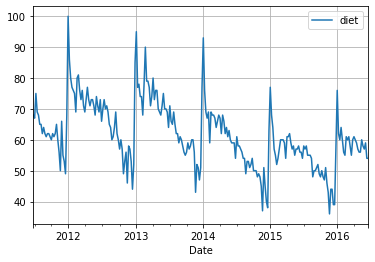

In [5]:
diet.plot(grid=True)
plt.show()
#searches for 'diet' spiked up after the holidays every year.

#seasonal changes

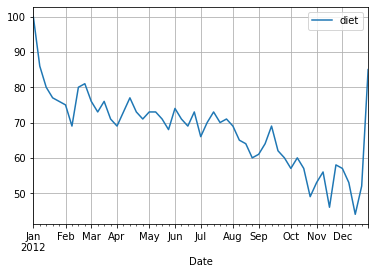

In [6]:
# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

In [7]:
stocks=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/SP500.csv',index_col='DATE')

#The observations for the S&P 500 represent the daily index value at market close. 
#The market typically closes at 4 PM ET, except for holidays when it sometimes closes early.

#https://fred.stlouisfed.org/

In [8]:
stocks.shape

(2609, 1)

In [9]:
stocks.loc['2017-05-31']

SP500    2411.8
Name: 2017-05-31, dtype: object

In [10]:
bonds=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/DGS10.csv',index_col='DATE')

#https://fred.stlouisfed.org/series/DGS10
#Stock and bond markets in the U.S. are closed on different days.

In [11]:
bonds.shape

(2609, 1)

In [12]:
sum(stocks['SP500']=='.')

92

In [13]:
indices = stocks[stocks['SP500']=='.'].index
stocks.drop(indices,inplace=True)

In [14]:
sum(bonds['DGS10']=='.')

107

In [15]:
indices = bonds[bonds['DGS10']=='.'].index

In [16]:
bonds.drop(indices,inplace=True)
bonds.shape

(2502, 1)

In [17]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)
#dates where the stock market has data but the bond market does not.

np.shape(list(set_stock_dates - set_bond_dates))
#20 days that stock market is open but bond market did not

{'2016-11-11', '2020-11-11', '2020-12-28', '2014-10-13', '2018-10-08', '2018-11-12', '2015-11-11', '2013-11-11', '2011-11-11', '2014-11-11', '2017-10-09', '2016-10-10', '2015-10-12', '2012-10-08', '2013-10-14', '2011-10-10', '2019-10-14', '2020-10-12', '2019-11-11', '2012-11-12'}


(20,)

In [18]:
stocks_and_bonds = stocks.join(bonds,how='inner') #intersection
#merge the stock and bond DataFrames on dates when both markets are open.
stocks_and_bonds.shape

(2497, 2)

two unrelated time series may have high correlation(stock price)
computing the corrleation of percentage changes(returns), correlation goes down to approximately zero
therefore, when looking at correlation of two stocks, we should look at correlation of returns(percentage changes),
but not their levels(stock price)

Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets 
for asset allocation and hedging purposes.

In [19]:
stocks_and_bonds.rename(columns={'DGS10': 'US10Y'},inplace=True)
stocks_and_bonds

,SP500,US10Y
DATE,,
2010-12-29,1259.78,3.35
2010-12-30,1257.88,3.38
2010-12-31,1257.64,3.30
2011-01-03,1271.87,3.36
2011-01-04,1270.20,3.36
...,...,...
2020-12-18,3709.41,0.95
2020-12-21,3694.92,0.95
2020-12-22,3687.26,0.93


In [20]:
import platform
print(platform.python_version())

3.8.3


In [21]:
stocks_and_bonds.dtypes

SP500    object
US10Y    object
dtype: object

In [22]:
stocks_and_bonds['SP500'] = pd.to_numeric(stocks_and_bonds['SP500'], downcast='float')
stocks_and_bonds['US10Y'] = pd.to_numeric(stocks_and_bonds['US10Y'], downcast='float')

In [23]:
#Compute percentage changes of both series
returns = stocks_and_bonds.pct_change()
#these give the returns of the two series instead of price
returns

,SP500,US10Y
DATE,,
2010-12-29,NaN,NaN
2010-12-30,-0.001508,0.008955
2010-12-31,-0.000191,-0.023669
2011-01-03,0.011315,0.018182
2011-01-04,-0.001313,0.000000
...,...,...
2020-12-18,-0.003511,0.010638
2020-12-21,-0.003906,0.000000
2020-12-22,-0.002073,-0.021053


In [24]:
# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.45667985621203006


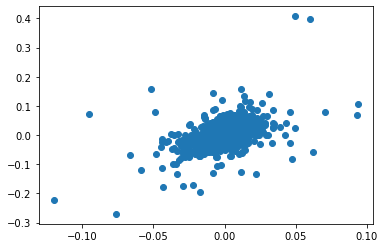

In [25]:
# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

The positive correlation means that when interest rates go down, stock prices go down. 
For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds 
(this is sometimes referred to as a 'flight to quality'). 
During these periods, stocks drop and interest rates drop as well.
Of course, there are times when the opposite relationship holds too.

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

For example:
Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376

Notice that the correlation on levels is high but the correlation on changes is close to zero.

In [26]:
# Import the statsmodels module
import statsmodels.api as sm
returns=returns.dropna()
y=returns['SP500']
x=returns['US10Y']

In [27]:
# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

The correlation between x and y is 0.46


In [28]:
# Convert the Series x to a DataFrame
dfx = pd.DataFrame(x)
dfx

,US10Y
DATE,
2010-12-30,0.008955
2010-12-31,-0.023669
2011-01-03,0.018182
2011-01-04,0.000000
2011-01-05,0.041667
...,...
2020-12-18,0.010638
2020-12-21,0.000000
2020-12-22,-0.021053


In [29]:
# Add a constant to the DataFrame dfx
dfx = sm.add_constant(dfx)
dfx

,const,US10Y
DATE,,
2010-12-30,1.0,0.008955
2010-12-31,1.0,-0.023669
2011-01-03,1.0,0.018182
2011-01-04,1.0,0.000000
2011-01-05,1.0,0.041667
...,...,...
2020-12-18,1.0,0.010638
2020-12-21,1.0,0.000000
2020-12-22,1.0,-0.021053


In [30]:
# Regress y on dfx1
result = sm.OLS(y, dfx).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     657.2
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          7.46e-129
Time:                        20:53:24   Log-Likelihood:                 8002.9
No. Observations:                2496   AIC:                        -1.600e+04
Df Residuals:                    2494   BIC:                        -1.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.571      0.0

correlation^2 is eqaul to R^2 (SLR)

In [31]:
result.params[0],result.params[1]

(0.000504574901491179, 0.16830472152110107)

A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. 

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

In [32]:
MSFT=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/MSFT.csv',index_col='Date')
MSFT

,Adj Close
Date,
8/6/2012,26.107651
8/7/2012,26.377876
8/8/2012,26.438896
8/9/2012,26.587088
8/10/2012,26.517351
...,...
7/31/2017,72.699997
8/1/2017,72.580002
8/2/2017,72.260002


In [33]:
MSFT.index = pd.to_datetime(MSFT.index)

In [34]:
MSFT = MSFT.resample(rule='W').last()
MSFT.shape

(261, 1)

In [35]:
returns = MSFT.pct_change()

In [36]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()

In [37]:
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))
#Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'
#Trading strategy: Buy losers and sell winners

The autocorrelation of weekly returns is -0.16


Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [38]:
# Compute the daily change in interest rates 
daily_rates=bonds
daily_rates.rename(columns={'DGS10': 'US10Y'},inplace=True)
daily_rates

,US10Y
DATE,
2010-12-27,3.36
2010-12-28,3.50
2010-12-29,3.35
2010-12-30,3.38
2010-12-31,3.30
...,...
2020-12-18,0.95
2020-12-21,0.95
2020-12-22,0.93


In [39]:
daily_rates['US10Y'] = pd.to_numeric(daily_rates['US10Y'], downcast='float')

In [40]:
daily_diff = daily_rates.diff()
daily_diff

,US10Y
DATE,
2010-12-27,NaN
2010-12-28,0.14
2010-12-29,-0.15
2010-12-30,0.03
2010-12-31,-0.08
...,...
2020-12-18,0.01
2020-12-21,0.00
2020-12-22,-0.02


In [41]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

The autocorrelation of daily interest rate changes is -0.01


In [42]:
# Convert the daily data to annual data
daily_rates.index = pd.to_datetime(daily_rates.index)
yearly_rates = daily_rates.resample(rule='A').last()

In [43]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.18


Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative

# Some Simple Time Series

In [44]:
HRB=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/HRB.csv')

In [45]:
HRB

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85
4,2008Q1,-0.34
5,2008Q2,-0.42
6,2008Q3,0.02
7,2008Q4,2.11
8,2009Q1,-0.39
9,2009Q2,-0.40


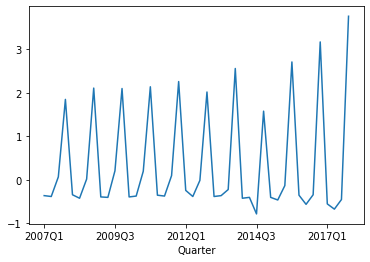

In [46]:
HRB.set_index('Quarter')['Earnings'].plot()
plt.show()

In [47]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


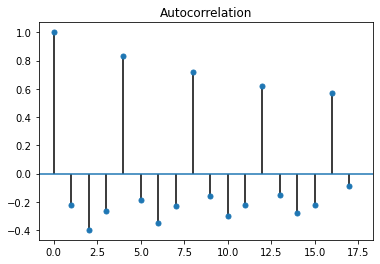

In [48]:
# Compute the acf array of HRB
acf_array = acf(HRB['Earnings'])
print(acf_array)

# Plot the acf function
plot_acf(HRB['Earnings'],alpha=1)
plt.show()

#Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...

Are We Confident This Stock is Mean Reverting?

The autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/sqrt(N), where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is +- 1.96/sqrt(N). This approximation only holds when the true autocorrelations are all zero.

In [49]:
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [50]:
returns.dropna(inplace=True)

In [51]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate 0.95 confidence interval is +/- %4.2f" %(conf))

The approximate 0.95 confidence interval is +/- 0.12


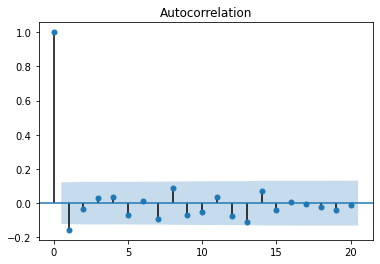

In [52]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

#Notice that the autocorrelation with lag 1 is significantly negative with the value -0.16,
#but none of the other lags are significantly different from zero (within +-0.12)

### White Noise

White noise is an important concept in time series forecasting. If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

Can't Forecast White Noise

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

In [53]:
# Simulate white noise returns
noise = np.random.normal(loc=0.02, scale=0.05, size=1000) #loc: mean, scale: std

# Print out the mean and standard deviation of returns
mean = np.mean(noise)
std = np.std(noise)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.018 and the standard deviation is 0.049


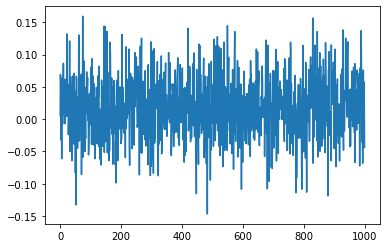

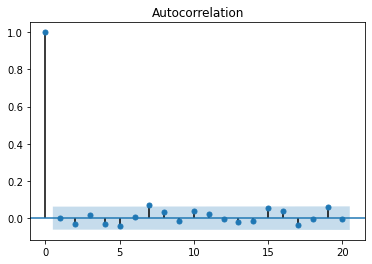

In [54]:
# Plot returns series
plt.plot(noise)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(noise, lags=20)
plt.show()

#Notice that for a white noise time series, 
#all the autocorrelations are close to zero, so the past will not help you forecast the future.

### Random Walk

What Is the Random Walk Theory?

Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement. In short, random walk theory proclaims that stocks take a random and unpredictable path that makes all methods of predicting stock prices futile in the long run.

Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price.

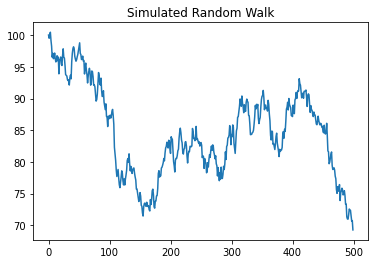

In [55]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()
#The simulated price series you plotted should closely resemble a random walk.

Get the Drift

In the last part, simulated stock prices follows a random walk. We will extend this in two ways.

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.

In the last part, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

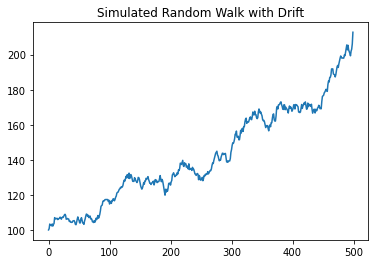

In [56]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()
#This simulated price series plotted should closely resemble a random walk for a high flying stock

In [57]:
AMZN=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/AMZN.csv',index_col='Date')

In [58]:
AMZN.index = pd.to_datetime(AMZN.index)
AMZN

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2017-07-27,1046.000000
2017-07-28,1020.039978
2017-07-31,987.780029


Are Stock Prices a Random Walk?

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk (beta=0). Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [59]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

#first: critical t value
#second: p value
#third: Number of lags used in regression to determine t-statistic. 
#fourth: no. of obs
#fifth: t test statistics at 1%,5%and 10% confidence intervals

(4.025168525770738, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. 

How About Stock Returns?

In the last part, Amazon stock prices follow a random walk. 

In this part, we will do the same thing for Amazon returns (percent change in prices) and show that the returns do NOT follow a random walk.

Stock Return: White Noise(can't forecast) & not random walk

Stock Price: Random Walk

In [60]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083466663e-22


The p-value is extremely small, so we can strongly reject the null hypothesis that, returns are a random walk at all levels of significance.

### Stationarity

Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

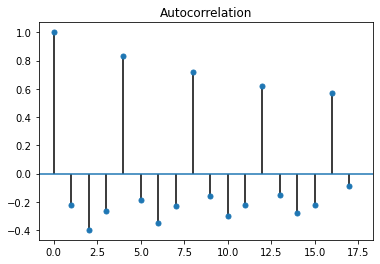

In [61]:
# Plot the acf function
plot_acf(HRB['Earnings'],alpha=1)
plt.show()

In [62]:
HRB=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/HRB.csv',index_col='Quarter')

In [63]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


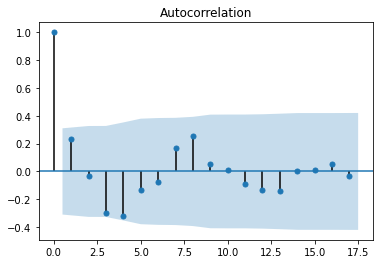

In [64]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

#By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function
#Transformed Nonstationary Series Into Stationary Series

# Autoregressive (AR) Models

White noise is stationary, and all random walk processes(with or without drift) are non-stationary.

The Random Walk without drift process is non-stationary.
Although the process has a constant mean of zero, its variances is ever-changing from
one time period to the next and. in fact, it approaches infinity as the sample size goes to
infinity.

AR(1) model: 
if the slope equals to 1, the process is a random walk.
if the slope is zero, the process is white noise.

The slope should be (-1,1) for the process to be stationary.

Negative slope: mean reversion
Positive slope: momentum

Slope=0.9: close to random walk
slope=-0.9: a large positive value followed by a large negative value

AR(1) autocorrelation functions decay expoentially at the rate of slope

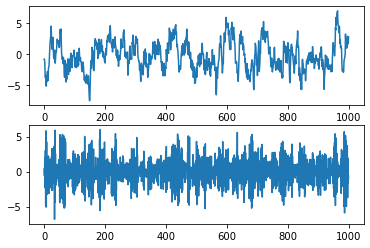

In [65]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9, close to random walk process
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9, a large positive value followed by a large negative value
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

### Compare the ACF for Several AR Time Series

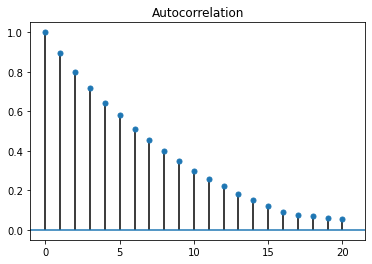

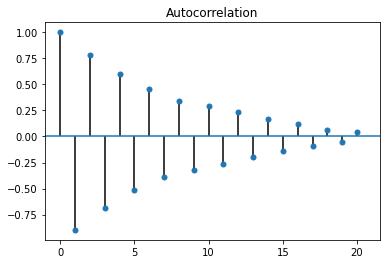

In [66]:
# Plot 1: AR parameter = +0.9, suppress CI
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

### Estimating an AR Model

In [67]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the constant and the estimate of phi are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1453.093
Method:                       css-mle   S.D. of innovations              1.034
Date:                Fri, 01 Jan 2021   AIC                           2912.187
Time:                        20:53:27   BIC                           2926.910
Sample:                             0   HQIC                          2917.783
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2732      0.311     -0.878      0.380      -0.883       0.337
ar.L1.y        0.8958      0.014     63.991      0.000       0.868       0.923
                                    Roots           

### Forecasting

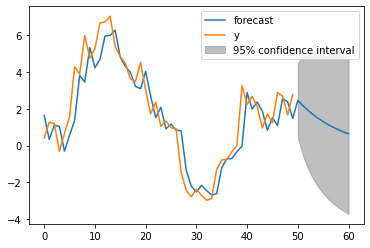

In [68]:
# Forecast the first AR(1) model
res.plot_predict(start=950, end=1010) #no of obs in the model is 1000
plt.show()

When phi is high (0.9 here), the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. 

In [69]:
interest_rate_data=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/interest_rate.txt',sep='     ',header=None)
interest_rate_data.columns = ["Date", "Rate"]

<ipython-input-69-44597f339b31>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  interest_rate_data=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/interest_rate.txt',sep='     ',header=None)


In [70]:
interest_rate_data

,Date,Rate
0,1962-12-31,3.85
1,1963-12-31,4.14
2,1964-12-31,4.21
3,1965-12-31,4.65
4,1966-12-31,4.64
5,1967-12-31,5.70
6,1968-12-31,6.16
7,1969-12-31,7.88
8,1970-12-31,6.50
9,1971-12-31,5.89


In [71]:
interest_rate_data['Date']=pd.to_datetime(interest_rate_data['Date'])

In [72]:
interest_rate_data.set_index('Date',inplace=True)

C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


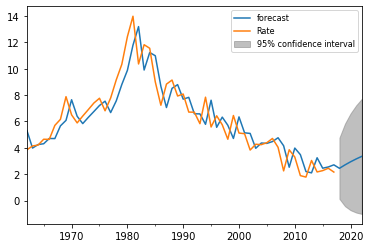

In [73]:
# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()

In [74]:
res.predict(start=0,end='2022')

#According to an AR(1) model, 10-year interest rates are forecasted to 
#rise from 2.16%, towards the end of 2017 to 3.35% in five years.

1962-12-31    5.305740
1963-12-31    3.981965
1964-12-31    4.245676
1965-12-31    4.309331
1966-12-31    4.709444
                ...   
2018-12-31    2.445166
2019-12-31    2.704482
2020-12-31    2.940290
2021-12-31    3.154722
2022-12-31    3.349715
Freq: A-DEC, Length: 61, dtype: float64

Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, the AR model attempts to quantify how much they are expected to rise.

Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

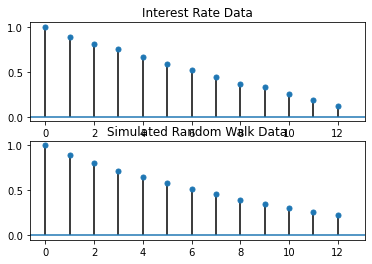

In [75]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data_1, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this part, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

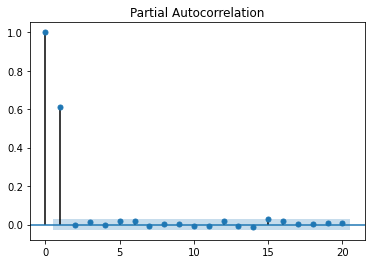

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

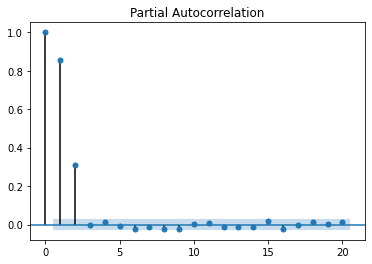

In [77]:
# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR model

Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last part, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

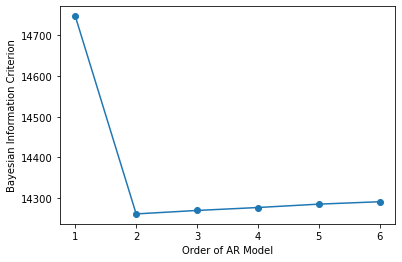

In [78]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

# Moving Average (MA) and ARMA Models

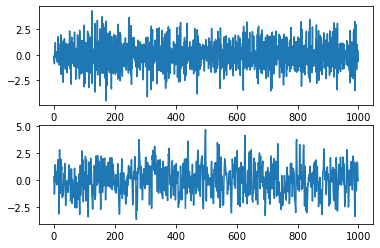

In [79]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

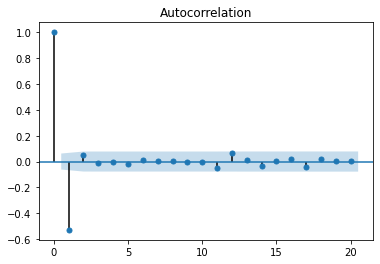

In [80]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

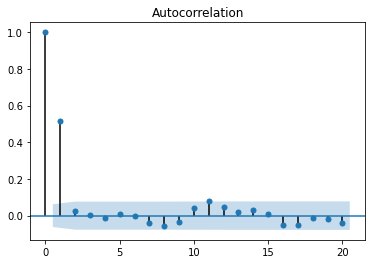

In [81]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not x(theta), but rather x/(1+x^2). For example, if the MA parameter, x, is = +0.9, the first-lag autocorrelation will be 0.9/(1+0.9^2)=0.497
, and the autocorrelation at all other lags will be zero. If the MA parameter, x, is -0.9, the first-lag autocorrelation will be 
be -0.9/(1+(-0.9)^2)=-0.497.

### Estimating an MA Model

In [82]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

#Notice how close the estimated parameter is to the true parameter.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1411.596
Method:                       css-mle   S.D. of innovations              0.992
Date:                Fri, 01 Jan 2021   AIC                           2829.191
Time:                        20:53:31   BIC                           2843.914
Sample:                             0   HQIC                          2834.787
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.002     -0.995      0.320      -0.007       0.002
ma.L1.y       -0.9251      0.013    -71.728      0.000      -0.950      -0.900
                                    Roots           

### Forecasting

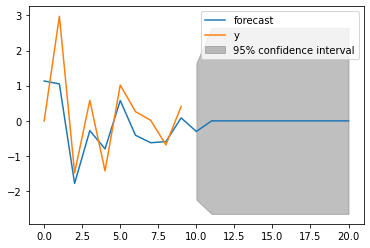

In [83]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010) #1000 obs
plt.show()

#Notice that the out-of-sample forecasts are flat into the future after the first data point.

One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

In [84]:
np.mean(simulated_data_1)

-0.0025310614111817608

### ARMA model

In [85]:
intraday=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/intraday.txt',delim_whitespace=True,header=None)

In [86]:
intraday=intraday.loc[:,1:2]
intraday

,1,2
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875
...,...,...
384,386,8.2750
385,387,8.2800
386,388,8.2750
387,389,8.2750


In [87]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

In [88]:
# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

DATE      object
CLOSE    float64
dtype: object


In [89]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

In [90]:
# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [91]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [92]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


In [93]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

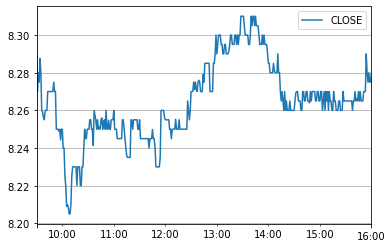

In [94]:
# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last part.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

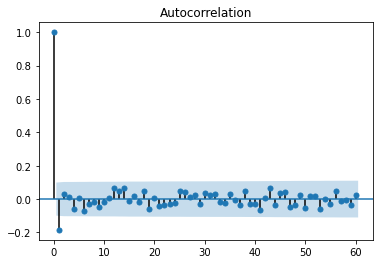

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [95]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

#Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(inf) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8^i. For a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with theta=0.8 .

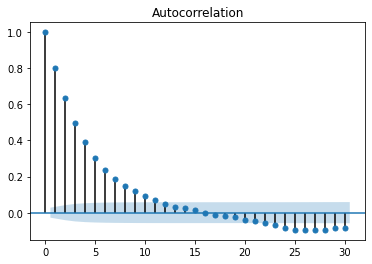

In [96]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()
#Notice that the ACF looks the same as an AR(1) with parameter 0.8

# Cointegration

In [97]:
NG=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/CME_NG1.csv',index_col='Date')
HO=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/data/CME_HO1.csv',index_col='Date')

In [98]:
NG.index=pd.to_datetime(NG.index)
HO.index=pd.to_datetime(HO.index)

First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in dollars per gallon, by 7.25, which converts it to dollars per millionBTU, which is the same units as Natural Gas).

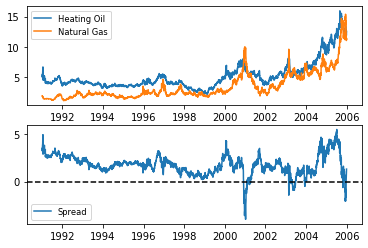

In [99]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small') 
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

#Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. 

In [100]:
# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25*HO['Close']-NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

#As we expected, we cannot reject the hypothesis that the individual futures are random walks, 
#but we can reject that the spread is a random walk.

The p-value for the ADF test on HO is  0.9567108785017873
The p-value for the ADF test on NG is  0.900874744467673
The p-value for the ADF test on the spread is  7.019439302142247e-05


In [101]:
BTC=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/BTC.txt',delim_whitespace=True,header=None)
BTC.columns = ["Date", "Price"]
ETH=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/ETH.txt',delim_whitespace=True,header=None)
ETH.columns = ["Date", "Price"]

In [102]:
BTC = BTC.set_index('Date')
ETH = ETH.set_index('Date')

In [103]:
# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

#The data suggests that Bitcoin and Ethereum are cointegrated.

The p-value for the ADF test is  0.023369002323473033


Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,-1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient b, then the cointegration vector is simply (1,-b). Then perform the ADF test on BTC-b*ETH.

### Climate Change

In [104]:
temp_NY=pd.read_csv('C:/Users/Jacob/Desktop/Online Course/Time series analysis in Python/NY_TEMP.txt',sep=',',header=None)
temp_NY.columns = ["DATE", "TAVG"]
temp_NY['DATE']=pd.to_datetime(temp_NY['DATE'],format='%Y')
temp_NY.set_index('DATE',inplace=True)

Is Temperature a Random Walk (with Drift)?

An ARMA model is a simplistic approach to forecasting climate changes.

The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the NOAA). Plot the data and test whether it follows a random walk (with drift).

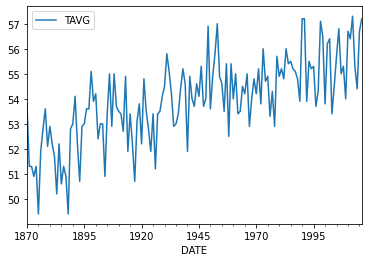

The p-value for the ADF test is  0.5832938987871136


In [105]:
# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

#The data seems to follow a random walk with drift.

Look at Autocorrelations

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

In [106]:
# Take first difference of the temperature Series
chg_temp = temp_NY.diff(1)
chg_temp = chg_temp.dropna()

# Compute and print ADF p-value
result = adfuller(chg_temp['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  9.824533837707675e-14


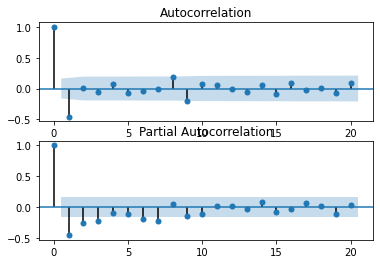

In [107]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

A PACF is similar to an ACF except that each correlation controls for any
correlation between observations of a shorter lag length. Thus, the value for the
ACF and the PACF at the first lag are the same because both measure the
correlation between data points at time t with data points at time t − 1. However,
at the second lag, the PACF measures the correlation between data points at time
t with data points at time t − 2 after controlling for the correlation between data
points at time t with those at time t − 1. 

https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8

Which ARMA Model is Best?

The Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

In [108]:
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

#The ARMA(1,1) has the lowest AIC values among the three models.

C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.92741231602264
The AIC for an ARMA(1,1) is:  469.07291580378507


Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


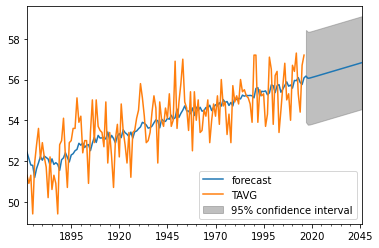

In [109]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.

In [110]:
temp_NY # from 1870 to 2016, forecast: from 2017 to 2046

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3
...,...
2012-01-01,57.3
2013-01-01,55.3
2014-01-01,54.4
